# Section 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')
sns.set_palette('Set2')

## Data

In [2]:
team_a = pd.DataFrame({
    'Name': [ 'Brooke', 'Alex', 'Jean' ],
    'Website': [ 3, 4, 3],
    'Database': [3, 3, 3],
    'Communication': [3, 2, 2],
    'Time': [3, 1, 3]
}).sort_values(by='Website', ascending=False)

display(team_a)

,Name,Website,Database,Communication,Time
1,Alex,4,3,2,1
0,Brooke,3,3,3,3
2,Jean,3,3,2,3


In [3]:
team_b = pd.DataFrame({
    'Name': [ 'Sky', 'Jesse', 'Sam' ],
    'Website': [5, 4, 4],
    'Database': [2, 1, 2],
    'Communication': [4, 2, 5],
    'Time': [2, 3, 1]
}).sort_values(by='Website', ascending=False)

display(team_b)

,Name,Website,Database,Communication,Time
0,Sky,5,2,4,2
1,Jesse,4,1,2,3
2,Sam,4,2,5,1


In [4]:
team_c = pd.DataFrame({
    'Name': [ 'Andy', 'Cole', 'Blake' ],
    'Website': [2, 3, 3],
    'Database': [2, 1, 3],
    'Communication': [3, 2, 5],
    'Time': [3, 2, 3]
})

display(team_c)

,Name,Website,Database,Communication,Time
0,Andy,2,2,3,3
1,Cole,3,1,2,2
2,Blake,3,3,5,3


In [5]:
team_d = pd.DataFrame({
    'Name': [ 'Max', 'Devin', 'Val', 'Sid' ],
    'Website': [2, 2, 3, 1],
    'Database': [2, 1, 4, 4],
    'Communication': [1, 2, 2, 2],
    'Time': [1, 3, 3, 4]
})

display(team_c)

,Name,Website,Database,Communication,Time
0,Andy,2,2,3,3
1,Cole,3,1,2,2
2,Blake,3,3,5,3


In [6]:
class_avg = pd.concat(
    [team_a, team_b, team_c, team_d],
    ignore_index=True
).drop(columns=['Name']).mean()

display(class_avg)

Website          3.000000
Database         2.384615
Communication    2.692308
Time             2.461538
dtype: float64

## Visualization

In [29]:
colors = sns.color_palette("Set2")

def viz(df, field, name, max_num = 15):
    data = df[field]
    sums = sum(data)
    avg = class_avg[field]
    labels = list(df['Name'])
    labels.insert(0, 'Average')

    _, ax = plt.subplots(figsize=(6.5, 6))
    ax.plot(['foo', field, 'bar'], [avg * 3] * 3, linestyle='--', color='red', linewidth=3)
    for i in range(len(data) - 1,  -1, -1):
        ax.bar(height=[0, sums, 0], x=['foo', field, 'bar'], color=colors[i], width=1)
        sums -= data[i]
        
    ax.xaxis.set_visible(False)
    plt.legend(labels, fontsize=14)
    plt.ylabel(field, size=16)
    plt.yticks(np.arange(0, max_num + 1).tolist())
    plt.title(name, size=20)
    
    sns.despine()
    plt.show()

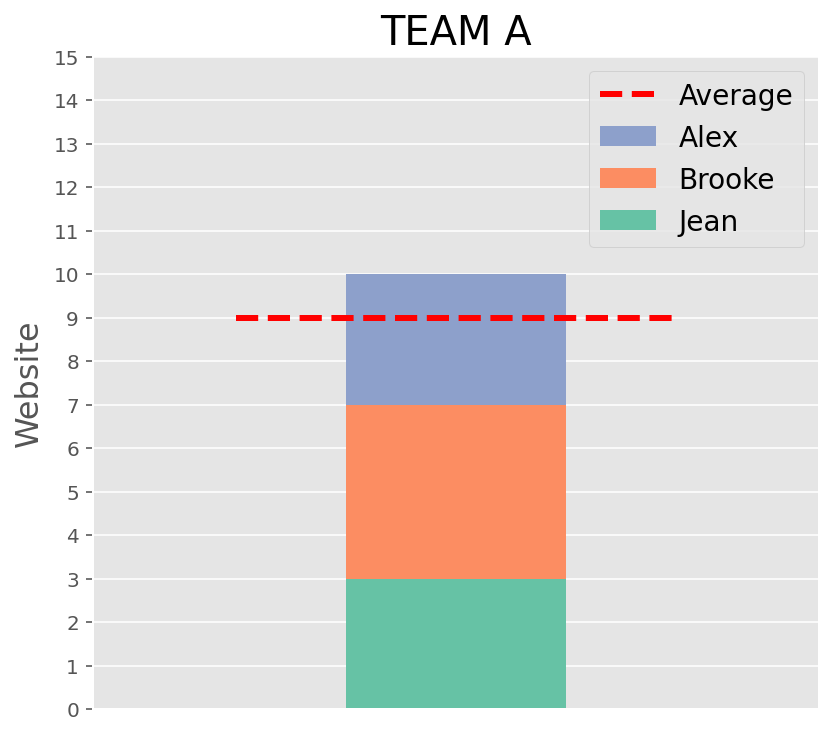

In [30]:
viz(team_a, 'Website', 'TEAM A')

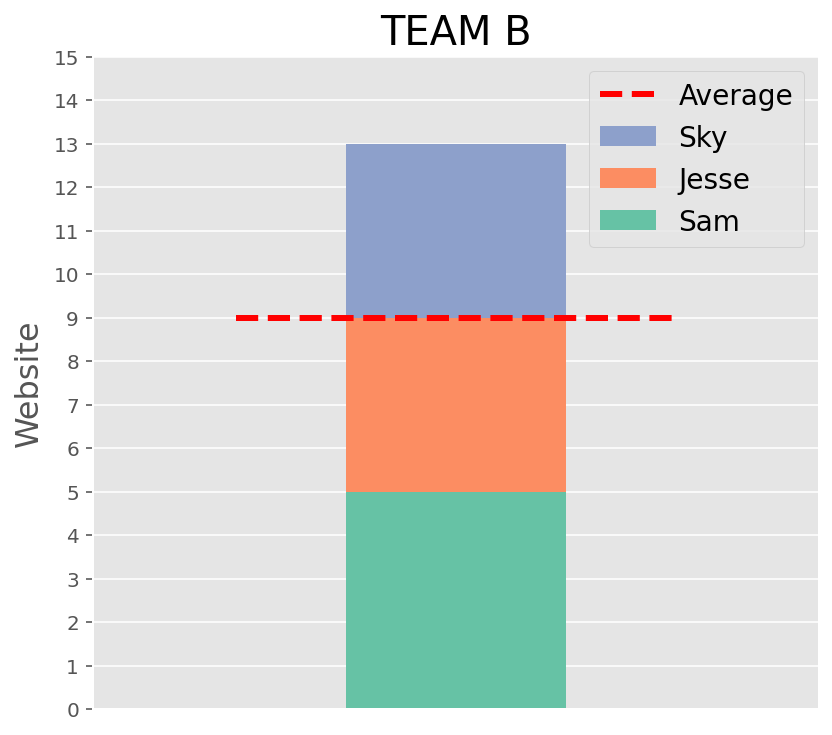

In [31]:
viz(team_b, 'Website', 'TEAM B')

In [33]:
def viz_bar(df, field, name, max_num = 5):
    data = df[field]
    team_avg = sum(data) / len(data)
    avg = class_avg[field]
    data = pd.DataFrame({
        'Name': ['Team average', 'Class average'],
        'Score': [team_avg, avg],
    })
    
    (
        sns
        .barplot(data=data, x='Name', y='Score')
        .set(xlabel='', ylabel=field, yticks=np.arange(0, max_num + 1).tolist())
    )
    
    plt.title(name, size=20)
    plt.ylabel(field, size=16)
    
    plt.show()

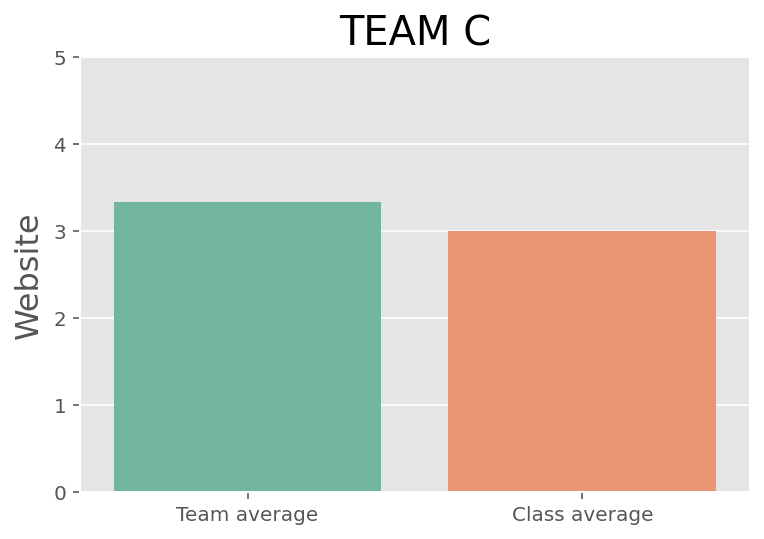

In [34]:
viz_bar(team_a, 'Website', 'TEAM C')

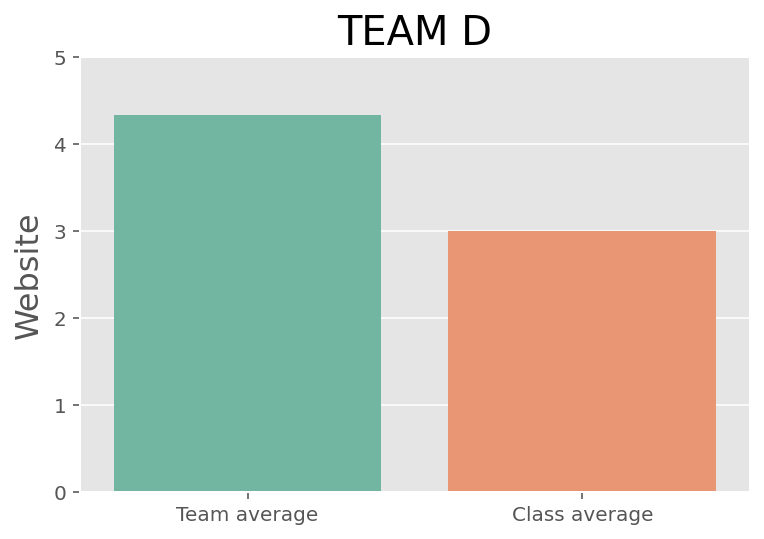

In [35]:
viz_bar(team_b, 'Website', "TEAM D")